In [4]:
!nvidia-smi

Tue Jan  3 02:09:39 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8     9W /  70W |      3MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# 1. Installation

## MMDetection github
**google mmdetection 검색**
- https://github.com/open-mmlab/mmdetection


## Install 절차
**installation 링크**
- https://github.com/open-mmlab/mmdetection/blob/master/docs/en/get_started.md/#Installation

### Step 1. Install MMCV using MIM.

In [5]:
!pip3 install openmim
!mim install mmcv-full

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu116/torch1.13.0/index.html


### Step 2. Install MMDetection from the source.

In [6]:
!git clone https://github.com/open-mmlab/mmdetection.git
%cd mmdetection
!pip install -e .

fatal: destination path 'mmdetection' already exists and is not an empty directory.
/content/mmdetection
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/mmdetection
  Attempting uninstall: mmdet
    Found existing installation: mmdet 2.26.0
    Can't uninstall 'mmdet'. No files were found to uninstall.
  Running setup.py develop for mmdet


### Step 3. Verification

In [7]:
import mmdet
print(mmdet.__version__)
# Example output: 2.26.0

2.26.0


### Step 4. Inference
- github home에서 Overview of Benchmark and Model Zoo 섹션 확인
- https://github.com/open-mmlab/mmdetection/tree/master/configs/yolo

In [8]:
!mim download mmdet --config yolov3_mobilenetv2_320_300e_coco --dest .

/usr/local/lib/python3.8/dist-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
processing yolov3_mobilenetv2_320_300e_coco...
yolov3_mobilenetv2_320_300e_coco_20210719_215349-d18dff72.pth exists in /content/mmdetection
Successfully dumped yolov3_mobilenetv2_320_300e_coco.py to /content/mmdetection


In [9]:
from mmdet.apis import init_detector, inference_detector

config_file = 'yolov3_mobilenetv2_320_300e_coco.py'
checkpoint_file = 'yolov3_mobilenetv2_320_300e_coco_20210719_215349-d18dff72.pth'
model = init_detector(config_file, checkpoint_file, device='cuda:0')  # or device='cuda:0'
inference_detector(model, 'demo/demo.jpg')

load checkpoint from local path: yolov3_mobilenetv2_320_300e_coco_20210719_215349-d18dff72.pth


[array([[5.12588043e+01, 1.13287674e+02, 6.75582962e+01, 1.32954651e+02,
         5.93154170e-02],
        [5.45404846e+02, 1.11175240e+02, 5.58186951e+02, 1.24366745e+02,
         5.03071770e-02],
        [3.66082550e+02, 1.23854057e+02, 3.81954681e+02, 1.45346939e+02,
         4.83216867e-02],
        [4.92554970e+01, 1.18862106e+02, 6.38435555e+01, 1.42556519e+02,
         4.66164500e-02],
        [5.28772766e+02, 1.10966644e+02, 5.40577209e+02, 1.23876968e+02,
         3.13960090e-02],
        [4.50718292e+02, 1.01557205e+02, 4.62131439e+02, 1.10339996e+02,
         2.94490680e-02],
        [2.09123947e+02, 9.55709305e+01, 2.23539291e+02, 1.06074486e+02,
         2.49082148e-02],
        [3.54278015e+02, 1.14047302e+02, 3.68170349e+02, 1.26227058e+02,
         2.37889793e-02],
        [2.86970093e+02, 1.19910126e+02, 3.04447571e+02, 1.50397369e+02,
         1.87797975e-02],
        [2.17763123e+02, 1.62588058e+02, 4.57619873e+02, 3.39809692e+02,
         1.80731546e-02],
        [1

# 2. Inference with Faster-RCNN
- MS-COCO 데이터 기반으로 학습된 Faster RCNN Pretrained 모델을 활용하여 Inference 수행

- github의 demo 디렉토리 아래 [MMDet_Tutorial.ipynb](https://github.com/open-mmlab/mmdetection/blob/master/demo/MMDet_Tutorial.ipynb) 파일 참조 

## Download pretrained model
- github의 configs/faster_rcnn 디렉토리의 Results and Models 섹션 확인
- 1x : epoch 12회, 2x : epoch 24회

In [10]:
# We download the pre-trained checkpoints for inference and finetuning.
!mkdir checkpoints
!wget -c https://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth \
      -O checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth

mkdir: cannot create directory ‘checkpoints’: File exists
--2023-01-03 02:10:22--  https://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 163.181.82.219, 163.181.82.217, 163.181.82.214, ...
Connecting to download.openmmlab.com (download.openmmlab.com)|163.181.82.219|:443... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



## Initialize Detector and Inference

- github의 demo 디렉토리 아래 [inference_demo.ipynb](https://github.com/open-mmlab/mmdetection/blob/master/demo/inference_demo.ipynb) 파일 참조 

In [11]:
from mmdet.apis import init_detector, inference_detector

# mmdetection 디렉토리 기준으로 상대 경로 지정
config_file = 'configs/faster_rcnn/faster_rcnn_r50_fpn_1x_coco.py'
checkpoint_file = 'checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth'

# config 파일과 pretrained 모델을 기반으로 Detector 모델을 생성. 
model = init_detector(config_file, checkpoint_file, device='cuda:0')  # or device='cpu'
# test sample에 대해 inference 수행
result = inference_detector(model, 'demo/demo.jpg')

load checkpoint from local path: checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth


/content/mmdetection/mmdet/datasets/utils.py:66: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  warnings.warn(


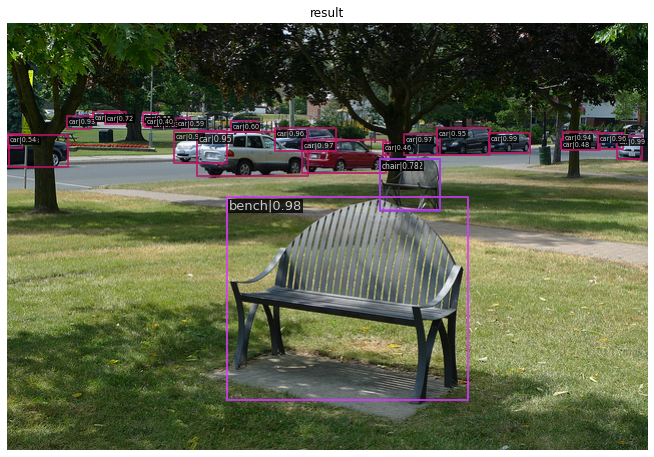

In [12]:
from mmdet.apis import show_result_pyplot

show_result_pyplot(model, 'demo/demo.jpg', result, score_thr=0.4)

In [13]:
model

FasterRCNN(
  (backbone): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): ResLayer(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
        

In [14]:
# results는 list형으로 coco class의  0부터 79까지 class_id별로 80개의 array를 가짐. 
# 개별 array들은 각 클래스별로 5개의 값(좌표값과 class별로 confidence)을 가짐. 
# 개별 class별로 여러개의 좌표를 가지면 여러개의 array가 생성됨. 
# 좌표는 좌상단(xmin, ymin), 우하단(xmax, ymax) 기준. 
# 개별 array의 shape는 (Detection된 object들의 수, 5(좌표와 confidence)) 임
type(result), len(result)

(list, 80)

In [15]:
result[0].shape, result[1].shape, result[2].shape, result[3].shape

((3, 5), (0, 5), (46, 5), (0, 5))

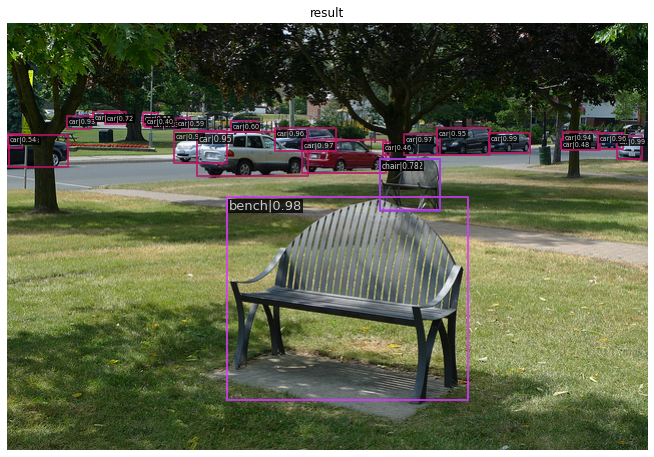

In [16]:
from mmdet.apis import show_result_pyplot

show_result_pyplot(model, 'demo/demo.jpg', result, score_thr=0.4)

## Video Inference
- github의 demo 디렉토리 아래 [video_demo.py](https://github.com/open-mmlab/mmdetection/blob/master/demo/video_demo.py) 파일 참조 

In [17]:
!mkdir data

mkdir: cannot create directory ‘data’: File exists


In [18]:
!wget -c https://github.com/mue76/data/raw/master/fast_furious_Trim.mp4 \
      -O data/fast_furious_Trim.mp4

--2023-01-03 02:10:25--  https://github.com/mue76/data/raw/master/fast_furious_Trim.mp4
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mue76/data/master/fast_furious_Trim.mp4 [following]
--2023-01-03 02:10:26--  https://raw.githubusercontent.com/mue76/data/master/fast_furious_Trim.mp4
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 416 Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



In [19]:
!wget -c https://github.com/mue76/data/raw/master/car_chasing.mp4 \
      -O data/car_chasing.mp4

--2023-01-03 02:10:26--  https://github.com/mue76/data/raw/master/car_chasing.mp4
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mue76/data/master/car_chasing.mp4 [following]
--2023-01-03 02:10:27--  https://raw.githubusercontent.com/mue76/data/master/car_chasing.mp4
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 416 Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



In [ ]:
import cv2
import mmcv

video_reader = mmcv.VideoReader('./data/fast_furious_Trim.mp4')
video_writer = None
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
video_writer = cv2.VideoWriter('./data/fast_furious_Trim_out.mp4', fourcc, video_reader.fps,(video_reader.width, video_reader.height))

for frame in mmcv.track_iter_progress(video_reader):
  result = inference_detector(model, frame)
  frame = model.show_result(frame, result, score_thr=0.5)

  video_writer.write(frame)

if video_writer:
        video_writer.release()

[>>>>>>>>>>>>>>>>>>>        ] 1362/1882, 2.9 task/s, elapsed: 470s, ETA:   179s

In [ ]:
!cp ./data/fast_furious_Trim_out.mp4 /content/drive/MyDrive/Classroom/data/out